In [1]:
import pandas as pd
import re
import numpy as np
import joblib
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
%matplotlib inline 
from wordcloud import WordCloud

In [2]:
columns=['comment_english','label']
df = pd.read_excel(r'C:\Users\Hp\TUGAS AKHIR 2\data_instagram.xlsx', usecols=columns)
df = df.replace(r'^\s*$', np.nan, regex=True)
df.head(4000)

,comment_english,label
0,['steady'],positive
1,"['process', 'stop', 'exolated', 'alur']",negative
2,"['subscribe', '']",negative
3,"['min', 'stop', 'subscribe', 'gazana']",negative
4,"['check', '']",negative
...,...,...
3205,"['guna', 'loyal', 'telkomsel', 'quality']",positive
3206,"['subscribe', 'loyal', 'telkomsel', 'ngak', 'c...",positive
3207,"['signal', 'emotion']",negative
3208,"['', 'get', ""]",negative


In [3]:
df['polaritas'] = df.label.map({'positive':1, 'negative':-1})
df

,comment_english,label,polaritas
0,['steady'],positive,1
1,"['process', 'stop', 'exolated', 'alur']",negative,-1
2,"['subscribe', '']",negative,-1
3,"['min', 'stop', 'subscribe', 'gazana']",negative,-1
4,"['check', '']",negative,-1
...,...,...,...
3205,"['guna', 'loyal', 'telkomsel', 'quality']",positive,1
3206,"['subscribe', 'loyal', 'telkomsel', 'ngak', 'c...",positive,1
3207,"['signal', 'emotion']",negative,-1
3208,"['', 'get', ""]",negative,-1


In [4]:
x = np.array(df['comment_english'].transpose())
y = df['polaritas']
print (x.shape)
print (y.shape)

(3210,)
(3210,)


In [5]:
#vektorisasi
vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(x)
print(x.shape)

(3210, 4021)


In [6]:
#splitting dataset ke dalam train dan test data (80 : 20)

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2, random_state=42)

print ('\n total data train : ', ytrain.shape)
print ('\n total data test : ', ytest.shape)


 total data train :  (2568,)

 total data test :  (642,)


In [7]:
print(xtrain.shape)
print(ytrain.shape)

(2568, 4021)
(2568,)


In [8]:
#klasifikasi data (80 : 20)
svc = SVC(kernel = "linear")

#memasukkan data training ke dalam klasifikasi SVM
svc = svc.fit(xtrain, ytrain)

#melakukan prediksi dari data test
predicted = svc.predict(xtest)
predicted

array([-1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,  1, -1,  1, -1,  1, -1,
        1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1, -1, -1,  1,
       -1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1,  1, -1,  1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1, -1, -1,  1,  1, -1, -1, -1,  1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,  1,  1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1,  1,  1, -1, -1, -1, -1, -1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1,  1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,
        1, -1,  1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  1, -1

In [9]:
print(accuracy_score(ytest, predicted))

0.8940809968847352


In [10]:
print(classification_report(ytest, predicted))

              precision    recall  f1-score   support

          -1       0.88      0.98      0.93       450
           1       0.95      0.68      0.79       192

    accuracy                           0.89       642
   macro avg       0.91      0.83      0.86       642
weighted avg       0.90      0.89      0.89       642



In [11]:
cnf_matrix = metrics.confusion_matrix(ytest, predicted)
cnf_matrix

array([[443,   7],
       [ 61, 131]], dtype=int64)

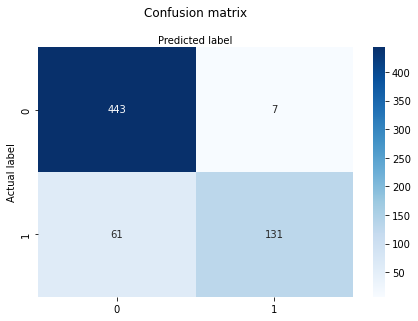

In [12]:
class_names=[-1,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="Blues" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()